# <font color='#eb3483'> Intro to Deep Learning - Image Classificatoin </font>
In this notebook we'll do a lightnig quick demonstration of how to build an image classifier using keras. Processing images (especially where it's hard to do feature engineering), is where deep learning shines - so this is a great skill to have in your toolbox!

In [3]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Conv2D, Flatten
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## <font color='#eb3483'> MNIST </font>
For this example we'll be working with the MNIST dataset - a database of handwritten digits. MNIST is kind of like the iris or titanic data set of image classification. Everyone's done it at some point when they started learning machine learning - it's a rite of passage (despite not being a terribly interesting problem)!

Lucky for us Keras has the dataset built-in!

In [6]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Each sample in our data set is a 28 by 28 pixel image.

In [10]:
X_train[0].shape

(28, 28)

We can take a peak at what our data looks like using matplotlib's imshow function.

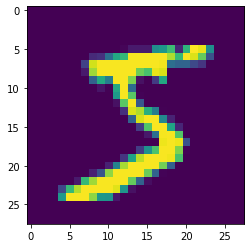

In [7]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

You'll notice that each pixel has a value between 0 and 255 (it's an intensity).

In [13]:
print(X_train[0].min(), X_train[0].max())

0 255


## <font color='#eb3483'> Data Pre-Processing </font>
To get our data ready for a convolutional neural network (i.e. fancy way to say a neural network with a special type of layer for processing images), we'll need to reshape our data into a tensor (i.e. a 3 dimensional matrix). We'll use numpy's handy reshape functionality for that.

In [14]:
#Reshape into #samples x (28 x 28 pixels) x (added dimension to make it a tensor)
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

We'll also convert everything to a float and get the values between 0 and 1 instead of 0 and 255.

In [15]:
#Convert data to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Convert values from [0,255] to [0,1]
X_train /= 255
X_test /= 255

You'll notice that this is a multi-class classification problem (there are 10 digits). 

In [17]:
#Look at all the possible categories we need to predict
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

To account for this we're going to ask our neural network to output a probability for each digit (i.e. for sample 1 it could output 80% chance it's a 2 and 20% chance its a 7). To do that we need to convert our y (target variable) to one-hot encoding. We'll do this using np_utils from keras.

In [18]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [20]:
#Now instead of one target we have 10!
Y_train.shape

(60000, 10)

## <font color='#eb3483'> Building a Model </font>
We're going to follow the same process that we did in the other deep learning notebook. 
1. Create a Model
2. Add Layers
3. Compile it
4. Train it
5. Evaluate it
The only difference is that we're going to use different layers, and a different loss function!

### Step 1: Create a Model

In [26]:
#Import the Sequential Model from keras.models and instantiate a model
from keras.models import Sequential
model = Sequential()

### Step 2: Add Layers
For this model we're going to use a special type of neural network layer called a convolutional later (and a flatten layer to go from convolution back to dense layer). Don't fret too much about the details - you can check out a whole host of resources on convolutional neural networks linked in the slides. Here's a little diagram about what a convolutional neural network looks like:

![title](media/CNN.png)

In [27]:
#We'll import the three kinds of layers we'll need for this model from keras.layers
from keras.layers import Dense, Conv2D, Flatten

#We'll add two convolutional layers (these are great at extracting features from images)
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
#This helps go from a convolutional layer to a dense layer
model.add(Flatten())
#For our output layer we want one neuron per category and we're going to use softmax to get probabilities
model.add(Dense(10, activation='softmax'))

### Step 3: Compile Model
We're going to use the same optimizer (ADAM) as before - but this time we're going to use categorical cross entropy instead of binary cross entropy (same idea but works for multi-class classification instead of binary)

In [29]:
model.compile(optimizer='adam',  # Set ADAM as our optimizer
              loss='categorical_crossentropy',  #Set our loss function to be categorical cross entropy
              metrics=['accuracy']) #Ask Keras to track accuracy for us

### Step 4: Fit the Model
This will take awhile!

In [30]:
model.fit(X_train, Y_train,  #Feed in our training data
          validation_data=(X_test, Y_test),  #Our testing data 
          epochs=1) #For this (because we have so much data, we're only going to do 1 epoch)


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 58s 973us/step - loss: 0.1267 - accuracy: 0.9619 - val_loss: 0.0538 - val_accuracy: 0.9831


### Step 5: Evaluate the Model
Instead of plotting our accuracy and loss curves, I'm just going to ask Keras to evaluate our final model (we won't do early stopping). Keras has a great function called evaluate to do that for us.

In [31]:
#Check out the help doc
model.evaluate?

In [34]:
_, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Model Accuracy: ', accuracy)

Model Accuracy:  0.9830999970436096


Woah - 98% accuracy!

### Step 6: Make Predictions
Let's make some predictions on our test data, and look at images of an example that we got wrong (to see how bad/good our model is)

In [36]:
#Let's just predict the final categories (i.e. the digits)
preds = model.predict_classes(X_test)

In [37]:
#Let's compare our predictions to the true categories
result = y_test == preds

We can now pull out specific examples we got wrong and plot them. Let's look at the one example:

Our prediction was 0 and the actual answer was 6


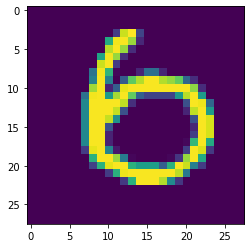

In [43]:
sample = 1
plt.imshow(X_test[~result][sample])
print(f'Our prediction was {preds[~result][sample]} and the actual answer was {y_test[~result][sample]}')

Play around with picking different samples (i.e. changing 1 in the above block). You'll notice alot of the mistakes are pretty reasonable!